In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

node = "MA_C1504"  # Adjust as needed
filestem = "mid_freq/MA_C1504"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True,  # using whitespace since your file preview has space separation
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

**********************************
Beginning quick node plotter for: MA_C1504/mid_freq/MA_C1504
**********************************


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_90216/35795687.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  unblanked_bliss_results = pd.read_csv(


Number of hits:  46


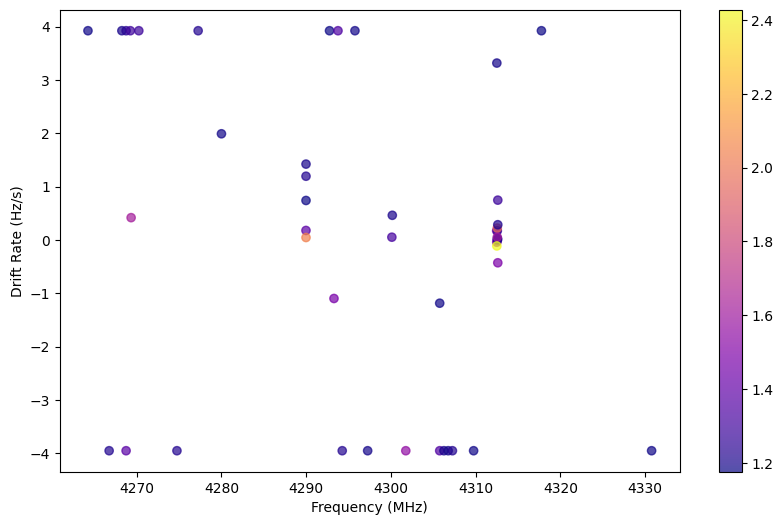

In [2]:
print("Number of hits: ", len(unblanked_bliss_results))

fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)

In [ ]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",         
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()


In [ ]:
#plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [ ]:
# define frequency ranges to blank, in MHz

blanking_ranges = [[4144,4178],[4190,4201],
                   ]

drift_ranges = [[-0.05,0.05]]

# remove hits in blanked ranges
for range in blanking_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Uncorrected_Frequency"].between(range[0], range[1])]
for range in drift_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Drift_Rate"].between(range[0], range[1])]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)
print("Number of hits: ", len(unblanked_bliss_results))

In [ ]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [ ]:
plt.hist(unblanked_bliss_results['Drift_Rate'], log=True, bins=100, color='red', alpha=0.7)

In [ ]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",       
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()